## Pseudo code

1. Create 81 lists, each with 9 elements
2. Perform hard assign. Overwrite the values of the lists based on initial values provided by Sudoku question
3. Update elements of the list which are not assigned, based on constraints
4. Select one list, whose length is greater than 1
5. Perform a soft assign. Assign the least value of elements in the list, to the list
6. Run step 3
7. If any error, drop the assigned value from the list
    7.1 if the length of the list is 1, then check for soft assignments run step 4 and beyond
    7.2 if length of the list is greater than 1, then step 5 and beyond
8. If no error, then select another list whose length is greater than 1
9. Run step 5 and beyond

### Constraints

a list cannot have elements which are present in any other single length list (SLL), given the SLL appears within the same block or horizontal row or vertical row

## Step 1: Create variables

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
sudoku_array = [[1, 2, 3, 4, 5, 6, 7, 8, 9]]
for i in range(80):
    sudoku_array.append([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Step 2: Assignment

### Difficulty level: Easy

In [4]:
# sudoku_array[1] = [3]
# sudoku_array[2] = [8]
# sudoku_array[6] = [2]
# sudoku_array[7] = [5]
# sudoku_array[8] = [4]
# sudoku_array[11] = [1]
# sudoku_array[14] = [2]
# sudoku_array[15] = [6]
# sudoku_array[17] = [7]
# sudoku_array[19] = [7]
# sudoku_array[22] = [6]
# sudoku_array[24] = [9]
# sudoku_array[26] = [3]
# sudoku_array[27] = [7]
# sudoku_array[31] = [1]
# sudoku_array[34] = [3]
# sudoku_array[36] = [5]
# sudoku_array[41] = [4]
# sudoku_array[42] = [1]
# sudoku_array[44] = [2]
# sudoku_array[45] = [1]
# sudoku_array[46] = [2]
# sudoku_array[47] = [3]
# sudoku_array[48] = [6]
# sudoku_array[54] = [8]
# sudoku_array[55] = [1]
# sudoku_array[56] = [7]
# sudoku_array[58] = [2]
# sudoku_array[59] = [6]
# sudoku_array[63] = [3]
# sudoku_array[64] = [9]
# sudoku_array[65] = [4]
# sudoku_array[66] = [8]
# sudoku_array[69] = [7]
# sudoku_array[71] = [6]
# sudoku_array[72] = [2]
# sudoku_array[74] = [5]
# sudoku_array[75] = [4]

#### difficulty level: Medium

In [5]:
# sudoku_array[1] = [7]
# sudoku_array[2] = [2]
# sudoku_array[3] = [5]
# sudoku_array[8] = [4]
# sudoku_array[12] = [8]
# sudoku_array[15] = [6]
# sudoku_array[18] = [8]
# sudoku_array[19] = [3]
# sudoku_array[24] = [2]
# sudoku_array[25] = [5]
# sudoku_array[27] = [1]
# sudoku_array[31] = [9]
# sudoku_array[32] = [6]
# sudoku_array[33] = [8]
# sudoku_array[37] = [8]
# sudoku_array[38] = [4]
# sudoku_array[43] = [9]
# sudoku_array[44] = [6]
# sudoku_array[47] = [6]
# sudoku_array[49] = [1]
# sudoku_array[50] = [8]
# sudoku_array[51] = [7]
# sudoku_array[52] = [4]
# sudoku_array[54] = [4]
# sudoku_array[57] = [9]
# sudoku_array[65] = [3]
# sudoku_array[68] = [5]
# sudoku_array[73] = [2]
# sudoku_array[75] = [3]
# sudoku_array[76] = [7]

https://sudoku.com

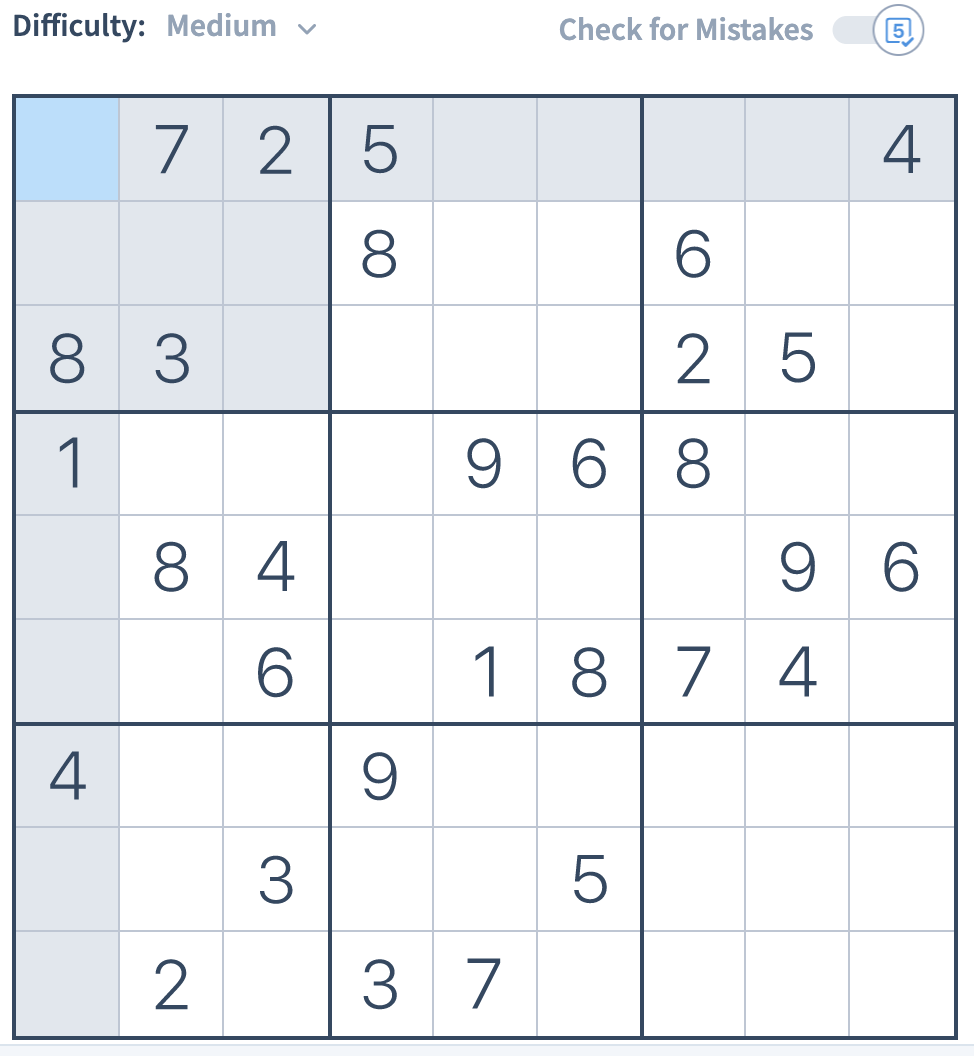

another Medium difficulty problem

In [6]:
sudoku_array[2] = [6]
sudoku_array[3] = [4]
sudoku_array[5] = [7]
sudoku_array[13] = [8]
sudoku_array[17] = [5]
sudoku_array[19] = [2]
sudoku_array[22] = [1]
sudoku_array[28] = [9]
sudoku_array[30] = [7]
sudoku_array[31] = [6]
sudoku_array[36] = [7]
sudoku_array[38] = [3]
sudoku_array[40] = [9]
sudoku_array[41] = [8]
sudoku_array[43] = [2]
sudoku_array[44] = [6]
sudoku_array[46] = [5]
sudoku_array[52] = [9]
sudoku_array[53] = [7]
sudoku_array[56] = [2]
sudoku_array[57] = [8]
sudoku_array[59] = [1]
sudoku_array[62] = [4]
sudoku_array[64] = [1]
sudoku_array[68] = [9]
sudoku_array[70] = [6]
sudoku_array[73] = [3]
sudoku_array[74] = [7]
sudoku_array[76] = [5]
sudoku_array[78] = [8]

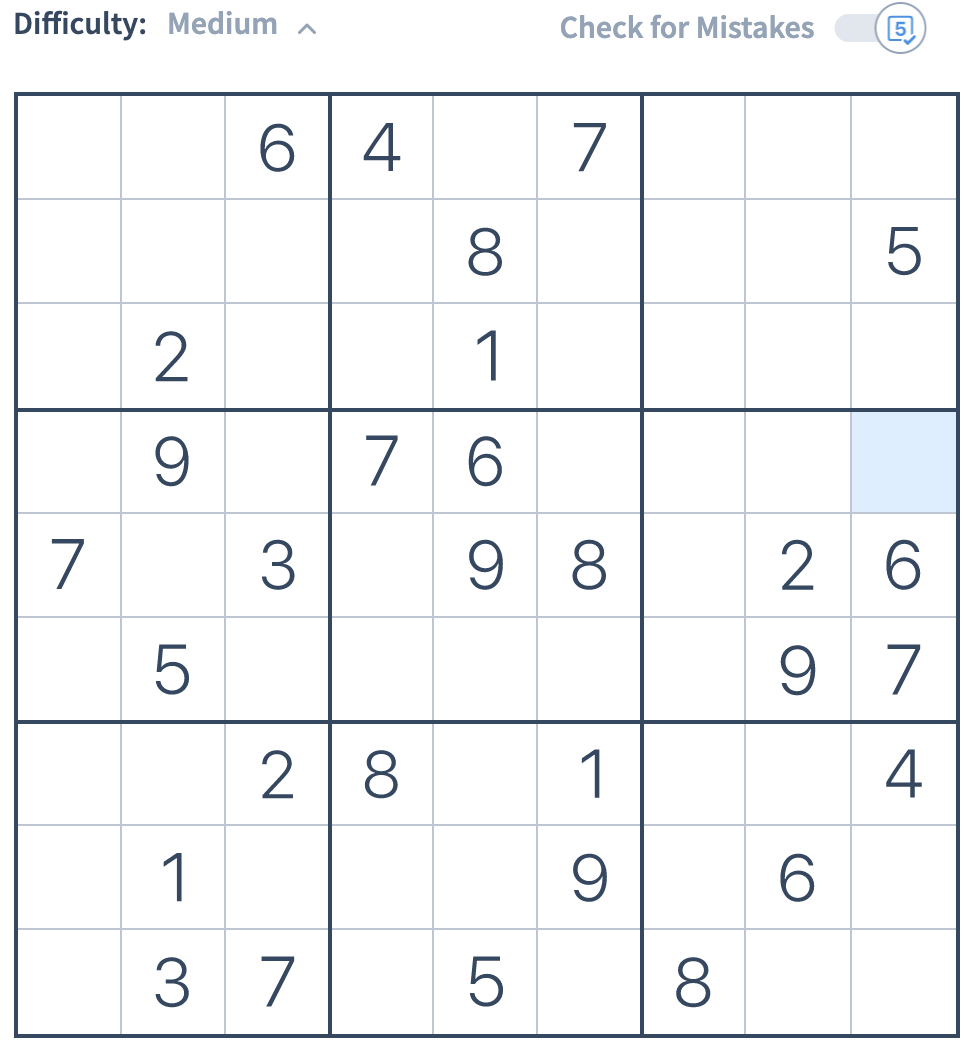

## Step 3: Update table

In [7]:
def row_excl_update():
    global row_excl
    row_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(0,80,9):
        k = i//9
        for j in range(i, i+9):
            if len(sudoku_array[j]) == 1:
                row_excl[k] = row_excl[k] + sudoku_array[j]
    return(row_excl)

In [8]:
row_excl_update()

[[0, 6, 4, 7],
 [0, 8, 5],
 [0, 2, 1],
 [0, 9, 7, 6],
 [0, 7, 3, 9, 8, 2, 6],
 [0, 5, 9, 7],
 [0, 2, 8, 1, 4],
 [0, 1, 9, 6],
 [0, 3, 7, 5, 8]]

In [9]:
def row_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in row_excl[i//9]]

In [10]:
def col_excl_update():
    global col_excl
    col_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(9):
        k = i
        for j in range(i, 80, 9):
            if len(sudoku_array[j]) == 1:
                col_excl[k] = col_excl[k] + sudoku_array[j]
    return(col_excl)

In [11]:
col_excl_update()

[[0, 7],
 [0, 2, 9, 5, 1, 3],
 [0, 6, 3, 2, 7],
 [0, 4, 7, 8],
 [0, 8, 1, 6, 9, 5],
 [0, 7, 8, 1, 9],
 [0, 8],
 [0, 2, 9, 6],
 [0, 5, 6, 7, 4]]

In [12]:
def col_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in col_excl[i%9]]

In [13]:
def box_excl_update():
    global box_excl
    box_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(81):
        k = ((i//3)//9)*3 + ((i//3)%3)
        if len(sudoku_array[i]) == 1:
            box_excl[k] = box_excl[k] + sudoku_array[i]
    return(box_excl)

In [14]:
box_excl_update()

[[0, 6, 2],
 [0, 4, 7, 8, 1],
 [0, 5],
 [0, 9, 7, 3, 5],
 [0, 7, 6, 9, 8],
 [0, 2, 6, 9, 7],
 [0, 2, 1, 3, 7],
 [0, 8, 1, 9, 5],
 [0, 4, 6, 8]]

In [15]:
box_excl

[[0, 6, 2],
 [0, 4, 7, 8, 1],
 [0, 5],
 [0, 9, 7, 3, 5],
 [0, 7, 6, 9, 8],
 [0, 2, 6, 9, 7],
 [0, 2, 1, 3, 7],
 [0, 8, 1, 9, 5],
 [0, 4, 6, 8]]

In [16]:
def box_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in box_excl[((i//3)//9)*3 + ((i//3)%3)]]

In [17]:
def issue_check():
    global error_flag_duplicate_list
    global error_flag_zero_list
    error_flag_duplicate_list = 0
    error_flag_zero_list = 0
    
    for i in range(9):
        if len([x for x in box_excl[i] if box_excl[i].count(x) > 1]) > 0: error_flag_duplicate_list+=1
    
    for i in range(81):
        if len(sudoku_array[i]) < 1: error_flag_zero_list+=1
    
    if error_flag_duplicate_list > 0:
        print("duplicate list error")
        return('error')

    if error_flag_zero_list > 0:
        print("zero list error")
        return('error')

In [18]:
#issue_check()

In [19]:
def filled_cnt():
    global filled_cnt_val
    filled_cnt_val = 0
    for i in range(81):
        if len(sudoku_array[i]) == 1:
            filled_cnt_val+=1
    return(filled_cnt_val)

In [20]:
def print_sudoku():
    sudoku_pd = pd.DataFrame(columns = ('a','b','c','d','e','f','g','h','i')) 
    
    for i in range(9):
        sudoku_pd = sudoku_pd.append({"a":sudoku_array[(i*9)+0],
                                      "b":sudoku_array[(i*9)+1],
                                      "c":sudoku_array[(i*9)+2],
                                      "d":sudoku_array[(i*9)+3],
                                      "e":sudoku_array[(i*9)+4],
                                      "f":sudoku_array[(i*9)+5],
                                      "g":sudoku_array[(i*9)+6],
                                      "h":sudoku_array[(i*9)+7],
                                      "i":sudoku_array[(i*9)+8]},ignore_index=True)
    
    return(sudoku_pd)

In [21]:
def re_evaluation():
    print("filled cells at start: ",filled_cnt())
    for i in range(81):
        if len(sudoku_array[i]) > 1: row_condn(i)
        if len(sudoku_array[i]) > 1: col_condn(i)
        if len(sudoku_array[i]) > 1: box_condn(i)
    print("filled cells at end: ",filled_cnt())
    row_excl_update()
    col_excl_update()
    box_excl_update()
    issue_check()

In [22]:
# re_evaluation()
# print_sudoku()

## Step 4: Soft assignment

In [23]:
bkup_stack = list()

In [24]:
def randi():
    index_value = 2
    print(index_value)

In [25]:
def soft_assignment():
    print("soft assignment starting...")
    bkup_stack.append(sudoku_array[:])
    
    global index_value
    
    index_value = next(sudoku_array.index(x) for x in sudoku_array if len(x) > 1)
    sudoku_array[index_value] = [sudoku_array[index_value][0]]
    
    print("copied dataset to bkup_stack")
    print(index_value,"element of the sudoku array is being iterated")
    print("updating row, col and box exclusion rules")
    row_excl_update()
    col_excl_update()
    box_excl_update()
    print("---soft assignment complete---")

In [26]:
def update_array():
    print("updating array based on latest assignments...")
    fc_s = 0
    fc_e = 1
    while (fc_s < fc_e):
        fc_s = filled_cnt()
        re_evaluation()
        fc_e = filled_cnt()
        if (error_flag_duplicate_list + error_flag_zero_list) > 0:
            break
    print("---array update complete---")

In [27]:
def cancel_assignment():
    global sudoku_array
    print("cancelling latest assignment at index ", index_value)
    sudoku_array.clear()
    sudoku_array = bkup_stack[len(bkup_stack)-1][:]
    sudoku_array[index_value] = sudoku_array[index_value][1:]
#     bkup_stack.pop()
    
    print("updating row, col and box exclusion rules")
    row_excl_update()
    col_excl_update()
    box_excl_update()
    
    if (len(sudoku_array[index_value]) == 0):
        print("cancelling previous assignment")
        cancel_assignment()
    
    print("---cancelling assignment complete---")

In [28]:
def recursive_eval():
    # Base case
    soft_assignment()
    
    update_array()
    print(print_sudoku())
    
    if (error_flag_duplicate_list + error_flag_zero_list) >  0:
        cancel_assignment()
        print(print_sudoku())
        recursive_eval()
        
    else:
        # Return the final state
        if filled_cnt_val == 81:
            return print(print_sudoku())
        
        # Recursive case
        # Thread the state through the recursive call
        else:
            return recursive_eval()

In [29]:
update_array()

updating array based on latest assignments...
filled cells at start:  30
filled cells at end:  34
filled cells at start:  34
filled cells at end:  36
filled cells at start:  36
filled cells at end:  38
filled cells at start:  38
filled cells at end:  38
---array update complete---


In [31]:
recursive_eval()

soft assignment starting...
copied dataset to bkup_stack
0 element of the sudoku array is being iterated
updating row, col and box exclusion rules
---soft assignment complete---
updating array based on latest assignments...
filled cells at start:  39
filled cells at end:  42
duplicate list error
---array update complete---
              a    b          c             d          e             f  \
0           [1]  [8]        [6]           [4]        [2]           [7]   
1        [3, 9]  [7]        [9]     [3, 6, 9]        [8]        [3, 6]   
2  [3, 4, 5, 9]  [2]  [4, 5, 9]  [3, 5, 6, 9]        [1]     [3, 5, 6]   
3        [2, 8]  [9]     [1, 8]           [7]        [6]  [2, 3, 4, 5]   
4           [7]  [4]        [3]        [1, 5]        [9]           [8]   
5     [2, 6, 8]  [5]     [1, 8]     [1, 2, 3]     [3, 4]     [2, 3, 4]   
6        [5, 9]  [6]        [2]           [8]     [3, 7]           [1]   
7     [4, 5, 8]  [1]  [4, 5, 8]        [2, 3]  [3, 4, 7]           [9]   
8        